# Google Data Analytics Capstone : Case Study 1 - Cyclists 

In 2016, Cyclistic launched a successful bike-share offering. Since then, the program has grown to a fleet of 5,824 bicycles that are geotracked and locked into a network of 692 stations across Chicago. The bikes can be unlocked from one station and
returned to any other station in the system anytime.

Until now, Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments.
One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. 
Customers who purchase single-ride or full-day passes are referred to as casual riders. Customers
who purchase annual memberships are Cyclistic members.
Cyclistic’s finance analysts have concluded that annual members are much more profitable than casual riders. Although the
pricing flexibility helps Cyclistic attract more customers, Moreno believes that maximizing the number of annual members will
be key to future growth. Rather than creating a marketing campaign that targets all-new customers, Moreno believes there is a
very good chance to convert casual riders into members. She notes that casual riders are already aware of the Cyclistic
program and have chosen Cyclistic for their mobility needs.

Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to
do that, however, the marketing analyst team needs to better understand how annual members and casual riders differ, why
casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are
interested in analyzing the Cyclistic historical bike trip data to identify trends.


## Objective (Goal)

Goals:

1. To understand difference between casual riders and members from data? 
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?


### Ask 

1. What is the problem you are trying to solve?
2. How can your insights drive business decisions?

So as we know what we are trying to solve we will look how this data gives us information on casual and members and how they differ from database. 
So we will perform analysis on data to see how cyclists use cycles for daily and monthly use. We will use hypothesis study to see why casual riders differ from members. 

In [73]:
# importing all libraries required 

import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
from pandas.api.types import CategoricalDtype

### Data Preparation 


1. Where is your data located?
2. How is the data organized?
3. Are there issues with bias or credibility in this data? Does your data ROCCC?
4. How are you addressing licensing, privacy, security, and accessibility?
5. How did you verify the data’s integrity?
6. How does it help you answer your question?
7. Are there any problems with the data?

Our Data is in csv files which is made available by Cyclistic company.(Note: The datasets have a different name because Cyclistic is a fictional company. For the purposes of this case study, the datasets are appropriate and will enable you to answer the business questions. The data has been made available by Motivate International Inc. under this license.) This is public data that you can use to explore how different customer types are using Cyclistic bikes.

Our Data is organized into multiple csv files which containes around 10 months of cyclists data from 2021 - 2022. 

Our Data is reliable as it is licensed. We can assure its credibility and integrity. 

There are some problems with data for eg: some data for station name and id are missing. So our next step will be preparing data for analysis. 

In [74]:
#concating all files as data for separate months is in different csv files. 

data = pd.concat(map(pd.read_csv, ['Trip_Data1.csv','Trip_Data2.csv','Trip_Data3.csv','Trip_Data4.csv','Trip_Data5.csv','Trip_Data6.csv','Trip_Data7.csv','Trip_Data10.csv','Trip_Data8.csv','Trip_Data9.csv']), ignore_index=True)

In [75]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,41.948150,-87.663940,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,41.948150,-87.663940,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,41.741487,-87.658410,casual


In [76]:
#data summary and data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5323881 entries, 0 to 5323880
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 528.0+ MB


In [77]:
#counting null values in data
data.isna().sum()

ride_id                    0
rideable_type              0
started_at                 0
ended_at                   0
start_station_name    679550
start_station_id      679547
end_station_name      724735
end_station_id        724735
start_lat                  0
start_lng                  0
end_lat                 4373
end_lng                 4373
member_casual              0
dtype: int64

In [78]:
#droping un_necessary columns 

data = data.drop(['end_lat','end_lng'],axis = 1)
data = data.dropna()

In [79]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,casual
...,...,...,...,...,...,...,...,...,...,...,...
5323827,B7FDA1D0A96177A3,classic_bike,2022-01-17 11:21:44,2022-01-17 11:28:02,Wells St & Walton St,TA1306000011,Kingsbury St & Kinzie St,KA1503000043,41.899930,-87.634430,member
5323871,222422C4575505E3,electric_bike,2022-01-13 09:49:02,2022-01-13 10:02:22,Milwaukee Ave & Wabansia Ave,13243,Kingsbury St & Kinzie St,KA1503000043,41.912670,-87.681550,member
5323874,F62C4E58DB8DC100,electric_bike,2022-01-19 16:40:42,2022-01-19 16:44:57,Broadway & Waveland Ave,13325,Clark St & Grace St,TA1307000127,41.949079,-87.648614,casual
5323878,CA281AE7D8B06F5A,electric_bike,2022-01-10 16:14:51,2022-01-10 16:20:58,Broadway & Waveland Ave,13325,Clark St & Grace St,TA1307000127,41.949066,-87.648611,casual


In [80]:
#checking if na values 
data.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
start_lat             0
start_lng             0
member_casual         0
dtype: int64

In [81]:
#changing format for dates as we need to perform calculations
#so converting object to datetime format
data['started_at'] = pd.to_datetime(data['started_at'],format = "%Y-%m-%d %H:%M:%S")
data['ended_at'] = pd.to_datetime(data['ended_at'], format = "%Y-%m-%d %H:%M:%S")

In [82]:
data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,member_casual
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,member
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,casual
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,casual
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,member
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,casual


In [83]:
#storing values of month and weekdays in dict

dayofweek= {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

month= {
    1: 'January', 
    2: 'February', 
    3: 'March', 
    4: 'April',
    5: 'May', 
    6: 'June', 
    7: 'July', 
    8: 'August', 
    9: 'September', 
    10: 'October',
    11: 'November', 
    12: 'December'
}



In [97]:
#using pandas datetime library to converting data and performing calculations

data['Day'] = data['started_at'].dt.day
data['Month'] = data['started_at'].dt.month.map(month)
data['Year'] = data['started_at'].dt.year
data['Day_of_Week'] = data['started_at'].dt.dayofweek.map(dayofweek)
data['Starting_Time'] = data['started_at'].dt.strftime('%H')
data['Ride_Length'] = data['ended_at'] - data['started_at']
data['Ride_Length_minute'] = (data['Ride_Length'].dt.total_seconds()/60).round(2) 

data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,member_casual,Day,Month,Year,Day_of_Week,Starting_Time,Ride_Length,Ride_Length_minute
0,6C992BD37A98A63F,classic_bike,2021-04-12 18:25:36,2021-04-12 18:56:55,State St & Pearson St,TA1307000061,Southport Ave & Waveland Ave,13235,41.897448,-87.628722,member,12,April,2021,Monday,18,0 days 00:31:19,31.32
1,1E0145613A209000,docked_bike,2021-04-27 17:27:11,2021-04-27 18:31:29,Dorchester Ave & 49th St,KA1503000069,Dorchester Ave & 49th St,KA1503000069,41.805772,-87.592464,casual,27,April,2021,Tuesday,17,0 days 01:04:18,64.30
2,E498E15508A80BAD,docked_bike,2021-04-03 12:42:45,2021-04-07 11:40:24,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,casual,3,April,2021,Saturday,12,3 days 22:57:39,5697.65
3,1887262AD101C604,classic_bike,2021-04-17 09:17:42,2021-04-17 09:42:48,Honore St & Division St,TA1305000034,Southport Ave & Waveland Ave,13235,41.903119,-87.673935,member,17,April,2021,Saturday,09,0 days 00:25:06,25.10
4,C123548CAB2A32A5,docked_bike,2021-04-03 12:42:25,2021-04-03 14:13:42,Loomis Blvd & 84th St,20121,Loomis Blvd & 84th St,20121,41.741487,-87.658410,casual,3,April,2021,Saturday,12,0 days 01:31:17,91.28


In [98]:
# taking data where length is not -ve and ride length is atmost 1 day which is 24hrs.
cleaned_data = data[(data['Ride_Length_minute'] >= 0) & (data['Ride_Length_minute'] < 1440)]

In [99]:
#number of unique values in variables 

cleaned_data.nunique()

ride_id               4334957
rideable_type               3
started_at            3698060
ended_at              3691112
start_station_name        844
start_station_id          835
end_station_name          841
end_station_id            833
start_lat              349356
start_lng              330413
member_casual               2
Day                        31
Month                      10
Year                        2
Day_of_Week                 7
Starting_Time              24
Ride_Length             21880
Ride_Length_minute      21880
dtype: int64

### Analysis 

Finding patterns and useful information through data by performing statistical operations.

1. Aggregate your data so it’s useful and accessible.
2. Organize and format your data.
3. Perform calculations.
4. Identify trends and relationships.

In [100]:
#types of cycles and most preferred cycles 
cycles = pd.DataFrame(cleaned_data['rideable_type'].value_counts())
cycles

,rideable_type
classic_bike,3048338
electric_bike,993776
docked_bike,292843


In [101]:
# total number of cyclists 
member_types = pd.DataFrame(cleaned_data['member_casual'].value_counts())
print(member_types)
print(member_types.sum())

        member_casual
member        2374111
casual        1960846
member_casual    4334957
dtype: int64


In [102]:
# summary of ride length according to casual and member
summary = cleaned_data.groupby("member_casual")['Ride_Length_minute'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
member_casual,,,,,,,,
casual,1960846.0,28.023033,48.648473,0.0,9.45,16.53,30.37,1439.37
member,2374111.0,13.076865,16.890724,0.0,5.68,9.65,16.38,1426.57


In [103]:
# finding which day has most cyclists 
riders_per_week = cleaned_data.groupby(["member_casual", "Day_of_Week"])['ride_id'].count()
riders_per_week

member_casual  Day_of_Week
casual         Friday         281286
               Monday         217527
               Saturday       443946
               Sunday         385673
               Thursday       218282
               Tuesday        204809
               Wednesday      209323
member         Friday         342203
               Monday         323119
               Saturday       328291
               Sunday         290342
               Thursday       354595
               Tuesday        363566
               Wednesday      371995
Name: ride_id, dtype: int64

In [104]:
# which day has most riders pper rider type 
cleaned_data.groupby("member_casual")['Day_of_Week'].describe()

,count,unique,top,freq
member_casual,,,,
casual,1960846,7,Saturday,443946
member,2374111,7,Wednesday,371995


In [105]:
# which month has most riders per rider type
cleaned_data.groupby("member_casual")['Month'].describe()

,count,unique,top,freq
member_casual,,,,
casual,1960846,10,July,369213
member,2374111,10,August,332913


In [106]:
# which month has highest avg ride time length per rider type 
ride_average_month = cleaned_data.groupby(["member_casual", "Month"])['Ride_Length_minute'].mean()
ride_average_month

member_casual  Month    
casual         April        32.092889
               August       27.090753
               December     20.131294
               January      18.076315
               July         28.453085
               June         30.741861
               May          33.120472
               November     20.178819
               October      24.343208
               September    26.192742
member         April        14.246816
               August       13.539697
               December     10.581252
               January      10.269938
               July         13.791005
               June         14.130080
               May          14.325008
               November     10.928334
               October      12.014455
               September    13.131007
Name: Ride_Length_minute, dtype: float64

In [107]:
# which day has highest avg ride time length per rider type 
ride_average_weekdays= cleaned_data.groupby(["member_casual", "Day_of_Week"])['Ride_Length_minute'].mean()
ride_average_weekdays

member_casual  Day_of_Week
casual         Friday         26.174573
               Monday         28.441450
               Saturday       30.240879
               Sunday         32.155011
               Thursday       24.099001
               Tuesday        25.541878
               Wednesday      24.274956
member         Friday         12.757129
               Monday         12.594893
               Saturday       14.679969
               Sunday         15.087661
               Thursday       12.291498
               Tuesday        12.254266
               Wednesday      12.358046
Name: Ride_Length_minute, dtype: float64

In [108]:
ride_average_time = cleaned_data.groupby(["member_casual", "Starting_Time"])['ride_id'].count()
ride_average_time

member_casual  Starting_Time
casual         00                41204
               01                30022
               02                19412
               03                10048
               04                 6473
               05                 8587
               06                18807
               07                34863
               08                47937
               09                58748
               10                81901
               11               107076
               12               126322
               13               134120
               14               137479
               15               144348
               16               158880
               17               186454
               18               169654
               19               131009
               20                95215
               21                80585
               22                74502
               23                57200
member         00                24

### Visualization

We will use graphs to see our analysis summary difference between members and casual riders.


Text(0.5, 1.0, 'Yearly rides per member')

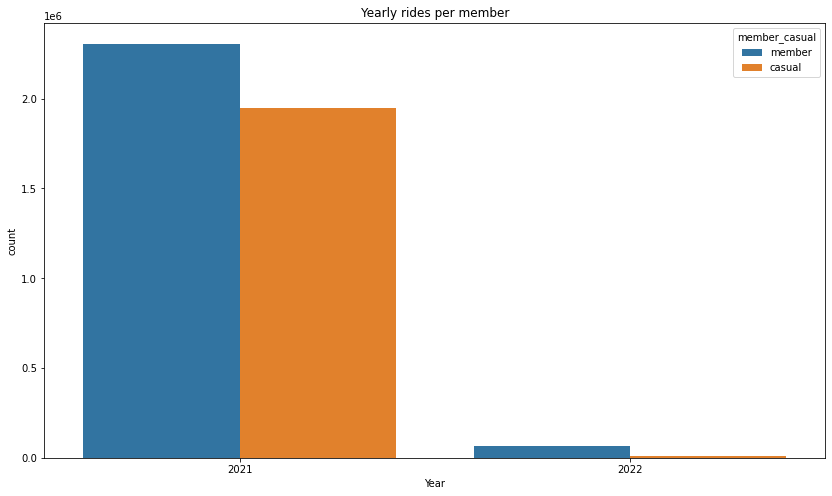

In [109]:
plt.figure(figsize = (14,8))
sns.countplot(x='Year',data = cleaned_data, hue='member_casual')
plt.title("Yearly rides per member")

Text(0.5, 1.0, 'Month rides per member')

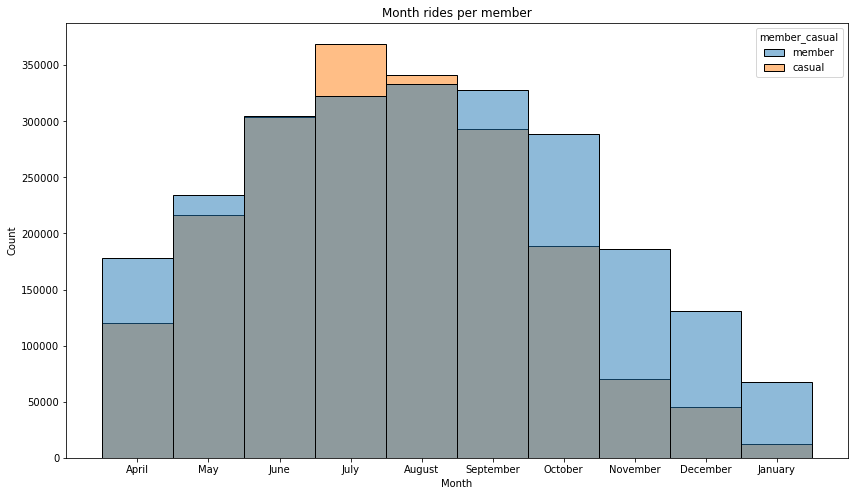

In [110]:
plt.figure(figsize = (14,8))
sns.histplot(x='Month',data = cleaned_data, hue='member_casual')
plt.title("Month rides per member")

Text(0.5, 1.0, 'Weekdays rides per member')

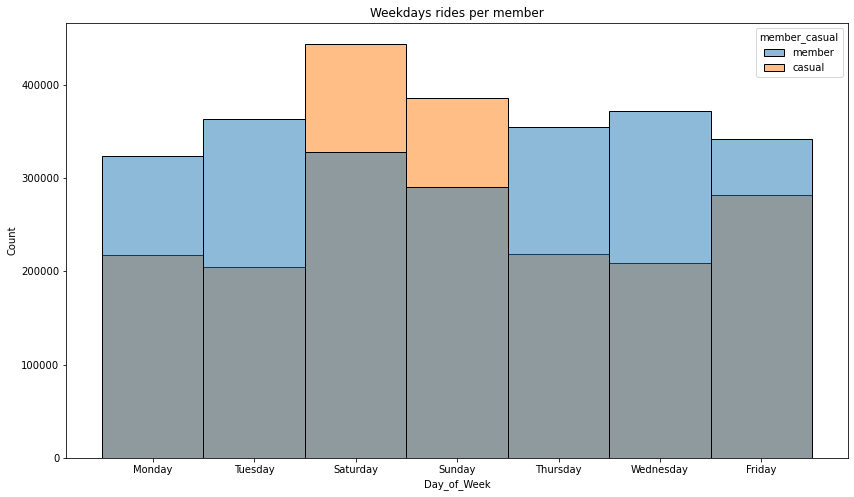

In [111]:
plt.figure(figsize = (14,8))
sns.histplot(x='Day_of_Week',data = cleaned_data, hue='member_casual')
plt.title("Weekdays rides per member")

Text(0.5, 1.0, 'Riders Preference')

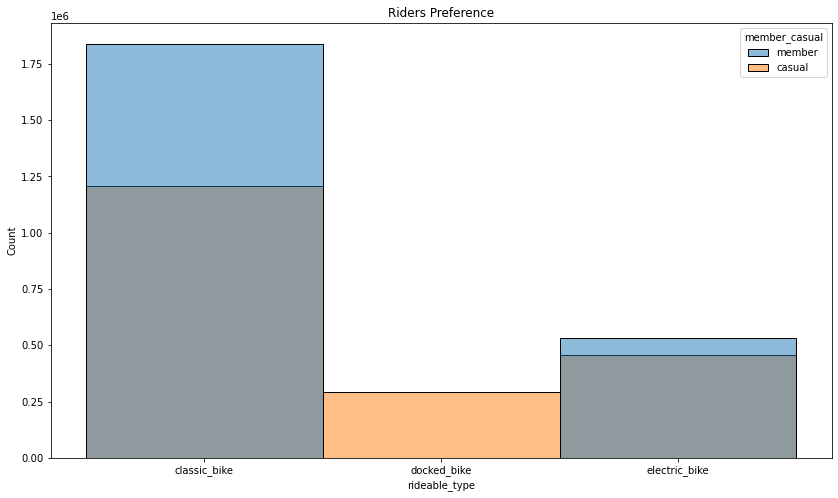

In [112]:
plt.figure(figsize = (14,8))
sns.histplot(x='rideable_type',data = cleaned_data, hue='member_casual')
plt.title("Riders Preference")

Text(0.5, 1.0, 'Riders Preference')

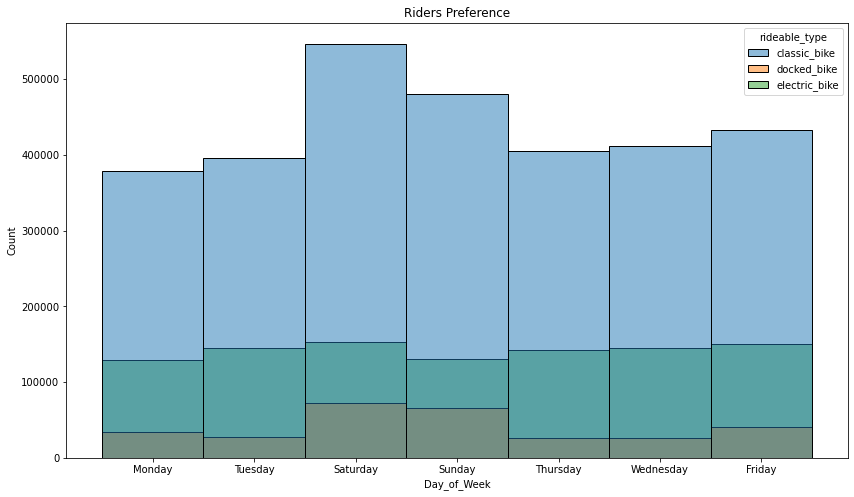

In [113]:
plt.figure(figsize = (14,8))
sns.histplot(x='Day_of_Week',data = cleaned_data, hue='rideable_type')
plt.title("Riders Preference")

Text(0.5, 1.0, 'Riders Preference')

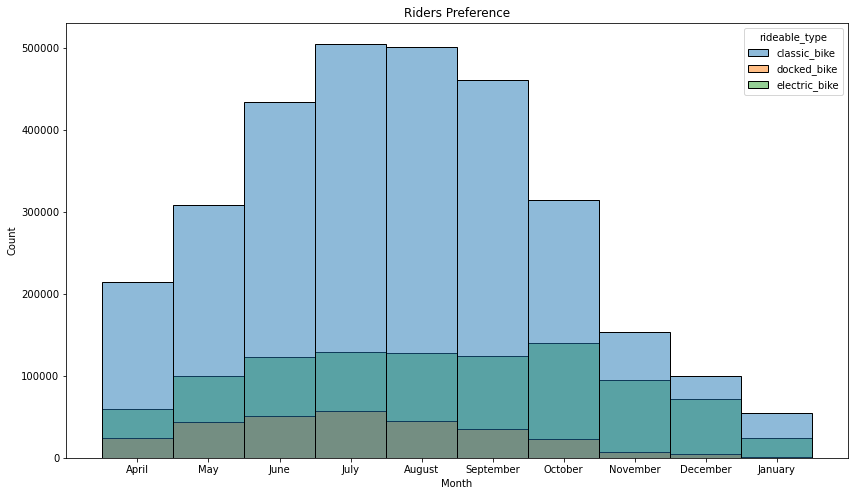

In [114]:
plt.figure(figsize = (14,8))
sns.histplot(x='Month',data = cleaned_data, hue='rideable_type')
plt.title("Riders Preference")

Text(0.5, 1.0, 'Riders Preference')

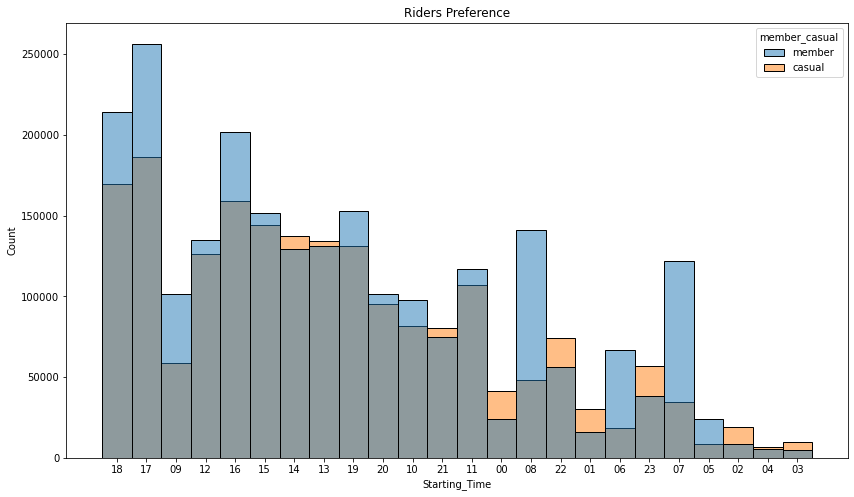

In [115]:
plt.figure(figsize = (14,8))
sns.histplot(x='Starting_Time',data = cleaned_data, hue='member_casual')
plt.title("Riders Start time graph")

### Summary and Observations from Data


There are more members than casual riders according ot data. 
1. According to riders count we saw that most of the casual riders take rides on weekends(Saturdays & Sundays). Whereas for members the number for riders is pretty much same for all weekdays. That means members are usually people who take these rides for their daily commute or for office transport. 

2. Most Casual members riders preferred month was July and August compared to other months. So, we will do further research for this and we will find out why this number is high. According to research we got to know that period between may to september is best to visit chicago. That's why we see trend in casual riders in these months. We can also see as november and december approches we see drop in riders because of holidays. 

3. For bikes type we see most people prefer electric or classic bike rather than docked bike. We got to know that electric bikes and classic bikes are much more better than docked bikes.

4. As we can notice most of the members use cycles for their daily commute which is in morning (07 to 12) and evening(16 to 20). Whereas for casual riders have less numbers we have less users around that time. We can see casual riders have good numbers of rider from 11 to night. 



### Conclusion

We can share to our team about pattern we found in members vs casual so that they can take appropriate actions to convert casual riders  to members. 
From our analysis we can suggest that casual riders prefer rides on weekends which can be taken as leisure riders. Time for these riders is also after 10 AM. Most of casual members were seen in month of july and august which can tell us that it is perfect weather condition in chicago for travelers and tourists.

So according to these facts team can make data driven decision to convert casual riders to members. 